In [5]:
from groupBMC.groupBMC import GroupBMC
import numpy as np
import scipy.io
import seaborn as sns
from statannot import add_stat_annotation
import matplotlib.pyplot as plt

rl_mat = scipy.io.loadmat('../model_fitting/lap_out/lap_RL_indiv_aff_score_precise_rt_action_manual.mat')
bias_mat = scipy.io.loadmat('../model_fitting/lap_out/lap_RL_bias_indiv_aff_score_precise_rt_action_manual.mat')
prior_mat = scipy.io.loadmat('../model_fitting/lap_out/lap_RL_prior_indiv_aff_score_precise_rt_action_manual.mat')
conf_mat = scipy.io.loadmat('../model_fitting/lap_out/lap_RL_conflict_indiv_aff_score_precise_rt_action_manual.mat')
cost_mat = scipy.io.loadmat('../model_fitting/lap_out/lap_RL_cost_indiv_aff_score_precise_rt_action_manual.mat') 
bayesian_mat = scipy.io.loadmat('../model_fitting/lap_out/lap_Bayesian_aff_as_bias_indiv_aff_score_precise_rt_action_manual.mat')
fxd_mat = scipy.io.loadmat('../model_fitting/lap_out/lap_RL_fixed_indiv_aff_score_precise_rt_action_manual.mat')
rel_mat = scipy.io.loadmat('../model_fitting/lap_out/lap_RL_reliability_indiv_aff_score_precise_rt_action_manual.mat')
perf_mat = scipy.io.loadmat('../model_fitting/lap_out/lap_RL_performance_indiv_aff_score_precise_rt_action_manual.mat')

rl_evidence = rl_mat['cbm'][0][0][-1][0][0][-1]
bias_evidence = bias_mat['cbm'][0][0][-1][0][0][-1]
prior_evidence = prior_mat['cbm'][0][0][-1][0][0][-1]
conf_evidence = conf_mat['cbm'][0][0][-1][0][0][-1]
cost_evidence = cost_mat['cbm'][0][0][-1][0][0][-1]
bayesian_evidence = bayesian_mat['cbm'][0][0][-1][0][0][-1]
fxd_evidence = fxd_mat['cbm'][0][0][-1][0][0][-1]
rel_evidence = rel_mat['cbm'][0][0][-1][0][0][-1]
perf_evidence = perf_mat['cbm'][0][0][-1][0][0][-1]

L = np.array([rl_evidence, bayesian_evidence, prior_evidence, bias_evidence, fxd_evidence, cost_evidence, conf_evidence, rel_evidence, perf_evidence]).reshape((9,19))
#L = np.array([rel_evidence, perf_evidence]).reshape((2,30))
result = GroupBMC(L).get_result()
label = ['RL', 'Bayes', 'Prior', 'Bias', 'Fixed', 'Cost', 'Conf', 'Rel', 'Perf']


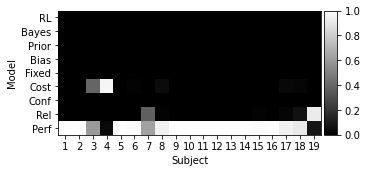

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rcParams
rcParams['figure.figsize'] = 5,5

plt.figure()
ax = plt.gca()
im = ax.imshow( result.attribution , cmap = 'gray')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
   
plt.colorbar(im, cax=cax)

ax.set_xticks(list(range(19)))
ax.set_xticklabels(list(range(1, 20)))
ax.set_xlabel('Subject')
ax.set_yticks(list(range(len(L))))
ax.set_yticklabels(label)
ax.set_ylabel('Model')

plt.savefig('/Users/YiSangHyun/Downloads/post.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

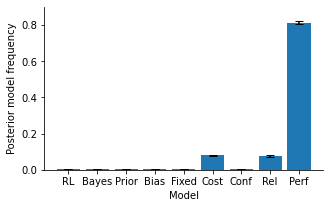

In [7]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5,3

_, ax = plt.subplots()
ax.bar(np.arange(len(L)), result.frequency_mean, yerr=result.frequency_var, ecolor='black', capsize=4)
ax.set_xticks(list(range(len(L))))
ax.set_xticklabels(label)
ax.set_xlabel('Model')
ax.set_ylim(0, 0.9)
ax.set_ylabel('Posterior model frequency')
sns.despine()

plt.savefig('/Users/YiSangHyun/Downloads/post_freq.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


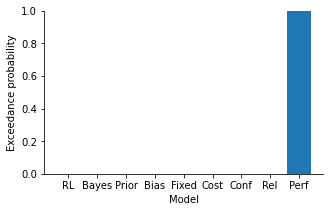

In [8]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5,3

_, ax = plt.subplots()
ax.bar(np.arange(len(L)), result.exceedance_probability)
ax.set_xticks(list(range(len(L))))
ax.set_xticklabels(label)
ax.set_xlabel('Model')
ax.set_ylim(0, 1)
ax.set_ylabel('Exceedance probability')
sns.despine()

plt.show()

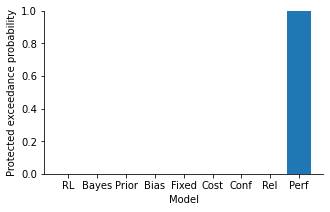

In [9]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5,3

_, ax = plt.subplots()
ax.bar(np.arange(len(L)), result.protected_exceedance_probability)
ax.set_xticks(list(range(len(L))))
ax.set_xticklabels(label)
ax.set_xlabel('Model')
ax.set_ylim(0, 1)
ax.set_ylabel('Protected exceedance probability')
sns.despine()

plt.savefig('/Users/YiSangHyun/Downloads/post_pxp.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
